In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Buat DataFrame contoh
data = {'Date': ['2022-10-09', '2022-10-09', '2022-10-10', '2022-10-10', '2022-11-11'],
        'Vehicle Type': ['motor', 'mobil', 'motor', 'truck', 'mobil'],
        'Income': [100, 200, 150, 300, 250]}
df = pd.DataFrame(data)

# Ubah kolom Date menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ekstrak bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.strftime('%Y-%m')




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5 non-null      datetime64[ns]
 1   Vehicle Type  5 non-null      object        
 2   Income        5 non-null      int64         
 3   Month         5 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 288.0+ bytes


In [ ]:
# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df.pivot_table(index='Month', columns='Vehicle Type', values='Income', aggfunc='sum', fill_value=0)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Mengganti xticks dengan nama bulan
months = pd.to_datetime(pivot_df.index).month
month_names = [calendar.month_name[month] for month in months]
ax.set_xticklabels(month_names)

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income')

# Menambahkan judul plot
ax.set_title('Stacked Bar Plot Demo')

# Menambahkan legenda
ax.legend(title='Vehicle Type')

# Menampilkan plot
plt.tight_layout()
plt.show()

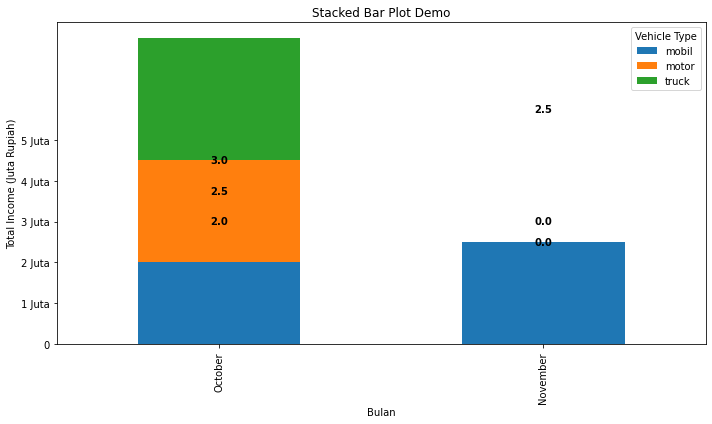

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Buat DataFrame contoh
data = {'Date': ['2022-10-09', '2022-10-09', '2022-10-10', '2022-10-10', '2022-11-11'],
        'Vehicle Type': ['motor', 'mobil', 'motor', 'truck', 'mobil'],
        'Income': [1000000, 2000000, 1500000, 3000000, 2500000]}  # Pendapatan dalam rupiah (ribuan)
df = pd.DataFrame(data)

# Ubah kolom Date menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ekstrak bulan dan tahun dari kolom Date
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df.pivot_table(index='Month', columns='Vehicle Type', values='Income', aggfunc='sum', fill_value=0)

# Konversi pendapatan menjadi juta (divided by 1,000,000)
pivot_df = pivot_df / 1000000

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Mengganti xticks dengan nama bulan
months = pd.to_datetime(pivot_df.index).month
month_names = [calendar.month_name[month] for month in months]
ax.set_xticklabels(month_names)

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income (Juta Rupiah)')  # Mengubah label sumbu Y

# Menambahkan judul plot
ax.set_title('Stacked Bar Plot Demo')

# Menambahkan legenda
ax.legend(title='Vehicle Type')

# Menambahkan nilai total income di masing-masing bar
for i, month in enumerate(pivot_df.index):
    for j, vehicle_type in enumerate(pivot_df.columns):
        total_income = pivot_df.loc[month, vehicle_type]
        ax.text(i, pivot_df.iloc[:i+1, j].sum() + total_income / 2, f'{total_income:.1f}',
                ha='center', va='center', fontweight='bold')

# Mengatur yticks
plt.yticks([0, 1, 2, 3, 4, 5], ['0', '1 Juta', '2 Juta', '3 Juta', '4 Juta', '5 Juta'])

# Menampilkan plot
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import random

# Membuat data time series dengan 100 data dalam format '2023-05'
dates = pd.date_range(start='2023-05-01', periods=100, freq='D')
random_data = [random.randint(1, 100) for _ in range(100)]

print(type(dates))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


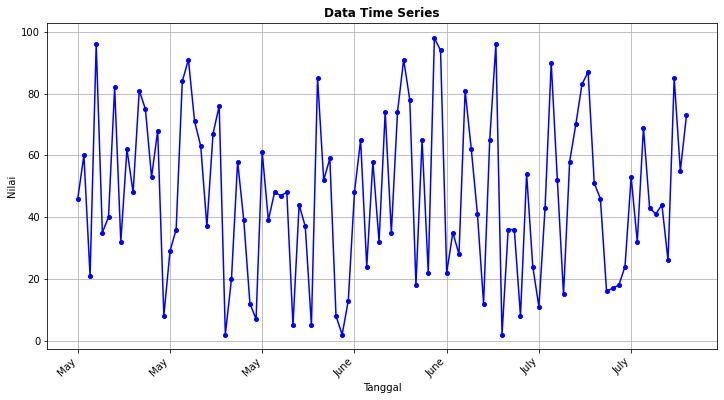

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import random

# Membuat data time series dengan 100 data dalam format '2023-05'
dates = pd.date_range(start='2023-05-01', periods=100, freq='D')
random_data = [random.randint(1, 100) for _ in range(100)]

# Plot data time series
plt.figure(figsize=(12, 6))
plt.plot(dates, random_data, linestyle='-', marker='o', markersize=4, color='b')
plt.title('Data Time Series', weight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.grid(True)

# Mengatur xticks dengan nama bulan
month_names = [calendar.month_name[date.month] for date in dates]
xticks_locations = range(0, len(dates), 15)  # Menampilkan setiap 15 hari
xticks_labels = [month_names[i] for i in xticks_locations]
plt.xticks(dates[xticks_locations], xticks_labels, rotation=45, ha='right')

plt.show()


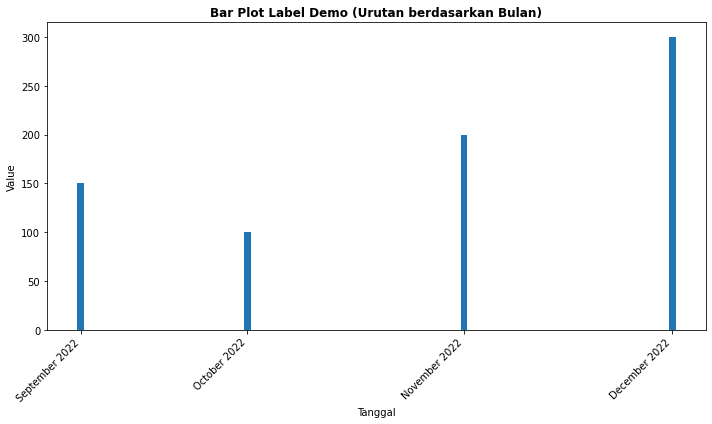

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame
data = {'Date': ['2022-10-15', '2022-11-10', '2022-09-25', '2022-12-05'],
        'Value': [100, 200, 150, 300]}
df = pd.DataFrame(data)

# Ubah kolom 'Date' menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Mengurutkan DataFrame berdasarkan bulan
df_sorted = df.sort_values(by='Date')

# Buat plot bar dengan label demo
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Date'], df_sorted['Value'])
plt.title('Bar Plot Label Demo (Urutan berdasarkan Bulan)', weight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Value')

# Mengatur xticks sesuai urutan bulan
months = df_sorted['Date'].dt.strftime('%B %Y')
plt.xticks(df_sorted['Date'], months, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [10]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4 non-null      datetime64[ns]
 1   Value   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 96.0 bytes


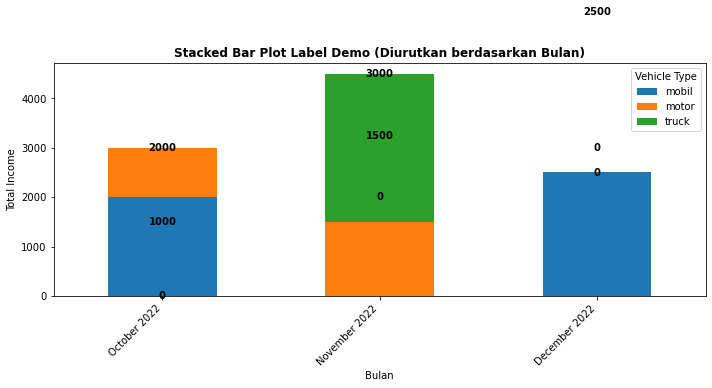

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame
data = {'Date': ['2022-10-09', '2022-10-09', '2022-11-10', '2022-11-10', '2022-12-15'],
        'Vehicle Type': ['motor', 'mobil', 'motor', 'truck', 'mobil'],
        'Income': [1000, 2000, 1500, 3000, 2500]}
df = pd.DataFrame(data)

# Ubah kolom 'Date' menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom 'Date'
df['Month'] = df['Date'].dt.strftime('%B %Y')

# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df.pivot_table(index='Month', columns='Vehicle Type', values='Income', aggfunc='sum', fill_value=0)

# Mengurutkan DataFrame berdasarkan bulan
sorted_months = pd.to_datetime(pivot_df.index, format='%B %Y').sort_values().strftime('%B %Y')
pivot_df = pivot_df.reindex(sorted_months)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income')

# Menambahkan judul plot
ax.set_title('Stacked Bar Plot Label Demo (Diurutkan berdasarkan Bulan)', weight='bold')

# Menambahkan legenda
ax.legend(title='Vehicle Type')

# Menambahkan nilai total income di masing-masing bar
for i, month in enumerate(sorted_months):
    for vehicle_type in pivot_df.columns:
        total_income = pivot_df.loc[month, vehicle_type]
        ax.text(i, pivot_df.loc[:month, vehicle_type].sum() + total_income / 2, f'{total_income}',
                ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
plt.show()


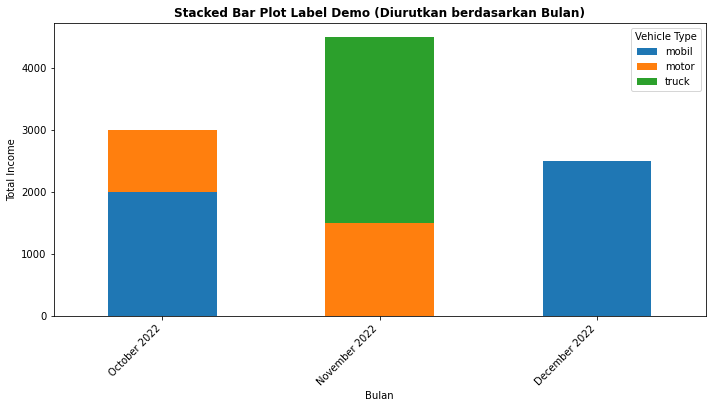

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame
data = {'Date': ['2022-10-09', '2022-10-09', '2022-11-10', '2022-11-10', '2022-12-15'],
        'Vehicle Type': ['motor', 'mobil', 'motor', 'truck', 'mobil'],
        'Income': [1000, 2000, 1500, 3000, 2500]}
df = pd.DataFrame(data)

# Ubah kolom 'Date' menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom 'Date'
df['Month'] = df['Date'].dt.strftime('%B %Y')

# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df.pivot_table(index='Month', columns='Vehicle Type', values='Income', aggfunc='sum', fill_value=0)

# Mengurutkan DataFrame berdasarkan bulan
sorted_months = pd.to_datetime(pivot_df.index, format='%B %Y').sort_values().strftime('%B %Y')
pivot_df = pivot_df.reindex(sorted_months)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income')

# Menambahkan judul plot
ax.set_title('Stacked Bar Plot Label Demo (Diurutkan berdasarkan Bulan)', weight='bold')

# Menambahkan legenda
ax.legend(title='Vehicle Type')

plt.tight_layout()
plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
plt.show()


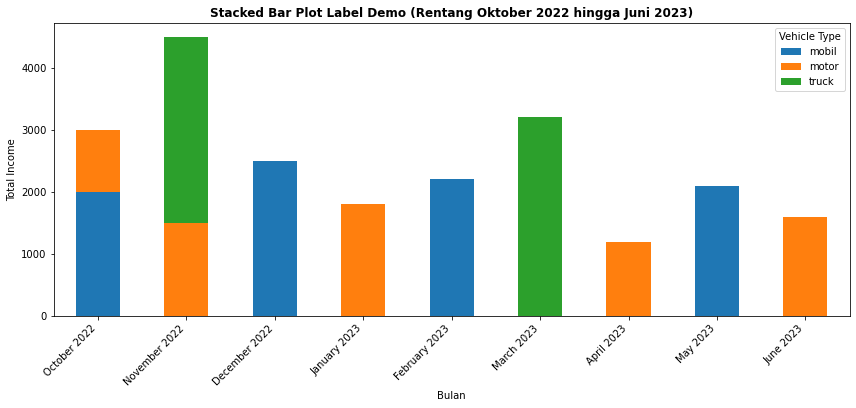

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame dengan data dari Oktober 2022 hingga Juni 2023
data = {'Date': ['2022-10-09', '2022-10-09', '2022-11-10', '2022-11-10', '2022-12-15', '2023-01-20', '2023-02-18', '2023-03-10', '2023-04-22', '2023-05-15', '2023-06-08'],
        'Vehicle Type': ['motor', 'mobil', 'motor', 'truck', 'mobil', 'motor', 'mobil', 'truck', 'motor', 'mobil', 'motor'],
        'Income': [1000, 2000, 1500, 3000, 2500, 1800, 2200, 3200, 1200, 2100, 1600]}
df = pd.DataFrame(data)

# Ubah kolom 'Date' menjadi objek datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom 'Date'
df['Month'] = df['Date'].dt.strftime('%B %Y')

# Filter data hanya untuk rentang Oktober 2022 hingga Juni 2023
#start_date = pd.to_datetime('2022-10-01', format='%Y-%m-%d')
#end_date = pd.to_datetime('2023-06-30', format='%Y-%m-%d')
#filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df.pivot_table(index='Month', columns='Vehicle Type', values='Income', aggfunc='sum', fill_value=0)

# Mengurutkan DataFrame berdasarkan bulan
sorted_months = pd.to_datetime(pivot_df.index, format='%B %Y').sort_values().strftime('%B %Y')
pivot_df = pivot_df.reindex(sorted_months)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income')

# Menambahkan judul plot
ax.set_title('Stacked Bar Plot Label Demo (Rentang Oktober 2022 hingga Juni 2023)', weight='bold')

# Menambahkan legenda
ax.legend(title='Vehicle Type')

plt.tight_layout()
plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
plt.show()


In [15]:
df.head()

,Date,Vehicle Type,Income,Month
0,2022-10-09,motor,1000,October 2022
1,2022-10-09,mobil,2000,October 2022
2,2022-11-10,motor,1500,November 2022
3,2022-11-10,truck,3000,November 2022
4,2022-12-15,mobil,2500,December 2022


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11 non-null     datetime64[ns]
 1   Vehicle Type  11 non-null     object        
 2   Income        11 non-null     int64         
 3   Month         11 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 480.0+ bytes


In [17]:
import pandas as pd

# Contoh DataFrame
data = {'Month': ['April 2023', 'August 2023', 'December 2022', 'February 2023'],
        'Total Income': [39964000, 69734000, 47998000, 43412000]}
df = pd.DataFrame(data)

# Ubah kolom 'Month' menjadi objek datetime dengan format 'Month Year'
df['Month'] = pd.to_datetime(df['Month'], format='%B %Y')

# Urutkan DataFrame berdasarkan kolom 'Month'
df_sorted = df.sort_values(by='Month')

# Tampilkan DataFrame yang sudah diurutkan
print(df_sorted)


       Month  Total Income
2 2022-12-01      47998000
3 2023-02-01      43412000
0 2023-04-01      39964000
1 2023-08-01      69734000
